# Cohen's algebraic Maass form

In "$q$-identities for Maass wave forms", H. Cohen defined an algebraic Maass wave form (i.e. Maass wave form of eigenvalue $\lambda = 1/4$) arises form one of the Ramanujan's $q$-series.
They are
$$
\begin{align*}
\sigma(q) &= \sum_{n \ge 0} \frac{q^{n(n+1)/2}}{(-q;q)_n} = 1 + \sum_{n \ge 0} (-1)^n q^{n+1}(q;q)_n \\
\sigma^\ast(q) &= 2\sum_{n \ge 0} \frac{(-1)^{n} q^{n^2}}{(q;q^2)_n} = -2 \sum_{n \ge 0} q^{n+1}(q^2;q^2)_n
\end{align*}
$$
Those two are related as $\sigma(q) = - \sigma^\ast(q^{-1})$ when $q$ is a root of unity.
Now if we define $\{T_C(n)\}_{n \in 24 \mathbb{Z} + 1}$ by
$$
q \sigma(q^{24}) = \sum_{n \ge 0} T_C(n)q^n, \qquad q^{-1} \sigma^\ast(q^{24}) = \sum_{n <0} T_C(n)q^{|n|},
$$
then $T_C(n)$ counts the number of elements in $\mathbb{Z}[\sqrt{6}]$ satisfying certain congruence conditions, and the function
$$
u(z) := \sqrt{y} \sum_{n \equiv 1 \,(\mathrm{mod}\,24)} T_C(n) K_0 \left(\frac{2 \pi |n|y}{24}\right) e^{2 \pi i n x / 24}, \quad z = x + iy \in \mathbb{H}
$$
becomes a Maass wave cuspform of level $\Gamma_0(2)$ and eigenvalue $1/4$ (i.e. algebraic), with suitable multiplier system.

Using the above expressions of $\sigma(q)$ and $\sigma^\ast(q)$, Zagier defined a function $f_C: \mathbb{Q} \to \mathbb{C}$ as
$$
f_C(x) = q^{1/24} \sigma(q) = q^{-1/24} \sigma^\ast(q), \quad q = e^{2 \pi i x}, x \in \mathbb{Q}
$$
and proved that $f_C$ becomes a quantum modular form of weight 1 and level $\Gamma_0(2)$ (with same multiplier system) as $u$; the error functions
$$
\begin{align*}
f_C(x) - \zeta_{24}^{-1} f_C(x + 1) &= 0 \\
f_C(x) - \zeta_{24}^{-1} \frac{1}{|2x + 1|} f_C\left(\frac{x}{2x + 1}\right) &= h_C(x)
\end{align*}
$$
are smooth and real-analytic except at $x = -1/2$. The error function $h_C(x)$ is essentially the "period function" of $u_C(z)$.

In [1]:
from quantum_modform import *

UCF = UniversalCyclotomicField()
E = UCF.gen

In [2]:
def sigma(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    for n in range(0, a + 1):
        r += (-1)**n * q**(n + 1) * poch(q, q, n)
    return r

def sigma_ast(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    for n in range(0, a + 1):
        r += q**(n + 1) * poch(q**2, q**2, n)
    return r * (-2)

def fC(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    return E(24 * a, b) * sigma(x)

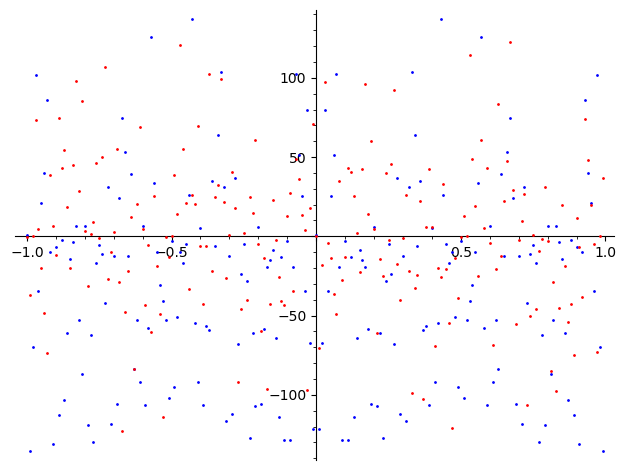

In [3]:
plot_func(fC, N=100, real_or_imag="both", join_points=False)

In [4]:
# Error functions
def fC_T(x):
    # This is identically zero
    return fC(x) - E(24, -1) * fC(x + 1)

def fC_S(x):
    # g(x)
    return fC(x) - E(24, -1) * abs(2 * x + 1)^(-1) * fC(x / (2 * x + 1))

# General error function
# The multiplier takes value \zeta_24 at [[1 1], [0 1]] and [[1 0], [2 1]]
# The generators of Gamma0(2) by Sage are [[1 1], [0 1]] and [[1 -1], [2 -1]],
# and we need to assign 1 for the second generator, since
# [[1 -1], [2 -1]] = [[1 0], [2 1]] * [[1 1], [0 1]]^(-1)
cohen_multiplier = construct_multiplier(2, [E(24), E(1)])
def fC_gamma(gamma):
    # f - f|gamma
    return error(fC, 1, cohen_multiplier, gamma)

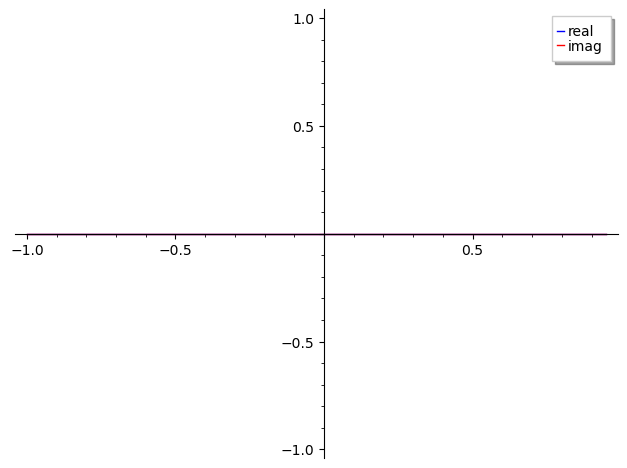

In [5]:
plot_func(fC_T, N=20, real_or_imag="both")

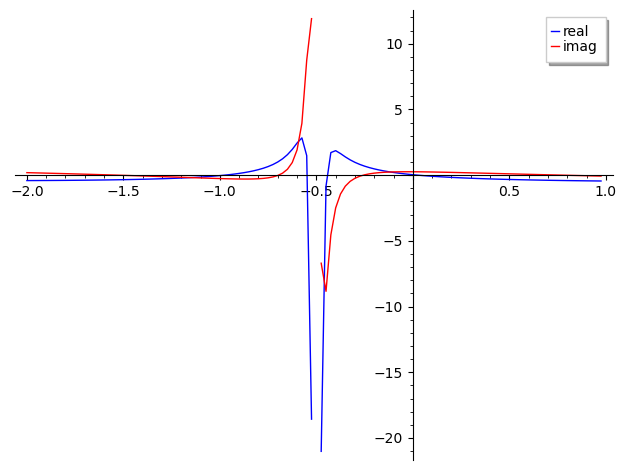

In [6]:
plot_func(fC_S, N=40, low=-2.0, high=1.0, real_or_imag="both", singular=[-1/2])

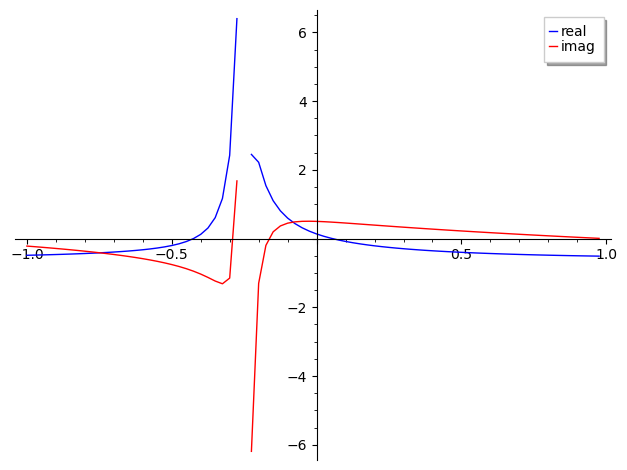

In [7]:
a, b, c, d = 5, 1, 4, 1  # gamma = [a b // c d]
gamma = Gamma0(2)([a, b, c, d])
singular = [] if c == 0 else [-d/c]
plot_func(fC_gamma(gamma), N=40, low=-1.0, high=1.0, real_or_imag="both", singular=singular)

# Li-Ngo-Rhoades' algebraic Maass Form

In the paper "Renormalization and quantum modular forms, part I: Maass wave forms", Li, Ngo, and Rhoades give a similar example as Cohen's which gives an algebraic Maass wave form whose coefficients count number of elements in $\mathbb{Z}[\sqrt{2}]$ with certain congruence conditions. It is defined using Corson–Favero–Liesinger–Zaubairy’s $q$-series $W_1(q)$ and $W_2(q)$:
$$
\begin{align*}
W_1(q) &:= \sum_{n \ge 0} \frac{(q;q)_n (-1)^n q^{n(n+1)/2}}{(-q;q)_n} = -\sum_{n \ge 0} \frac{(q;q^2)_n (-1)^n q^n}{(-q^2;q^2)_n} \\
W_2(q) &:= \sum_{n \ge 1} \frac{(-1;q^2)_n (-1)^n q^n }{(q;q^2)_n}
\end{align*}
$$
Now if we define $\{T_L(n)\}_{n \in 8\mathbb{Z} + 1}$ by 
$$
q W_1(q^8) + q^{-1}W_2(q^8) = \sum_{n \in \mathbb{Z}} T_L(n) q^{|n|},
$$
then
$$
u_L(z) := \sqrt{y} \sum_{n \in \mathbb{Z}} T_L(n) K_0 \left(\frac{2 \pi |n| y}{8} \right) e^{2 \pi i n x / 8}, \quad z = x + iy \in \mathbb{H}
$$
is a Maass wave form of level $\Gamma_0(4)$ and eigenvalue $1/4$, with suitable multiplier system. Note that it is not a cusp form; $\Gamma_0(4)$ has three cusps $\{0, 1/2, \infty\}$, and it only vanishes at $0$ and $\infty$.
If we put $S_0 = \Gamma_0(4).0 = \{b/a \in\mathbb{Q}:2 \nmid a\}$ and $S_\infty = \Gamma_0(4).\infty = \{b/a \in \mathbb{Q}: 4\mid a\}$, then the function
$$
f_L : S_0 \cup S_\infty \to \mathbb{C}, f_L(x) := \begin{cases} e^{2 \pi i x / 8} W_1(e^{2 \pi i x}) & x \in S_0 \\ e^{2 \pi i x / 8} W_2(e^{-2 \pi i x}) & x \in S_\infty \end{cases}
$$
is a quantum modular form of weight 1 and level $\Gamma_0(4)$; it satisfies
$$
\begin{align*}
f(x) - \zeta_{8}^{-1}f(x + 1) &= 0 \\
f(x) - \zeta_{8}^{-1} \frac{1}{|4x + 1|} f\left(\frac{x}{4x + 1}\right) &= h_L(x)
\end{align*}
$$
and $h_L(x)$ extends as a smooth function on $\mathbb{R}$ (except at $x = -1/4$).


In [8]:
def W_1(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    assert a % 2 == 1
    a1 = (a - 1) // 2
    for n in range(0, a1 + 1):
        r += (-q)**n * poch(q, q**2, n) / poch(-q**2, q**2, n)
    return -r

def W_2(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    assert a % 4 == 0
    a1 = a // 2
    for n in range(1, a1 + 1):
        r += (-q)**n * poch(-1, q**2, n) / poch(q, q**2, n)
    return r

def fL(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    assert a % 2 == 1 or a % 4 == 0
    if a % 2 == 1:
        return E(8 * a, b) * W_1(x)
    else:
        return E(8 * a, b) * W_2(-x)

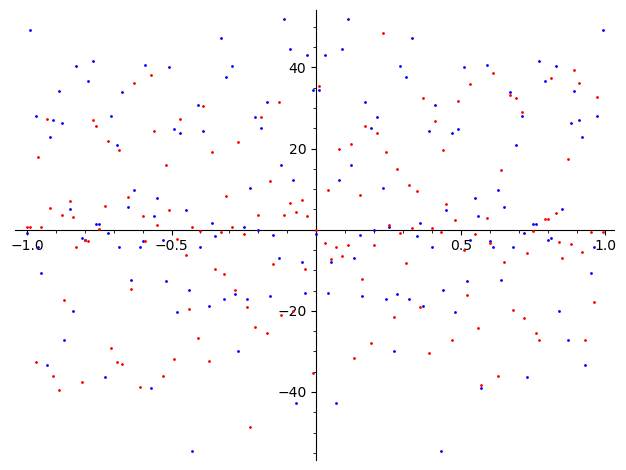

In [9]:
def S_half(N, low, high):
    m_low = int(ceil(low * N))
    m_high = int(ceil(high * N))
    ls = []
    for m in range(m_low, m_high):
        x = m / N
        if x.denom() % 2 == 0 and x.denom() % 4 != 0:
            ls.append(x)
    return ls

plot_func(fL, N=100, real_or_imag="both", join_points=False, exclude=S_half(100, -1.0, 1.0))

In [10]:
# Error functions
def fL_T(x):
    # This is identically zero
    return fL(x) - E(8, -1) * fL(x + 1)

def fL_S(x):
    # g(x)
    return fL(x) - E(8, -1) * abs(4 * x + 1)^(-1) * fL(x / (4 * x + 1))

# General error function
# The multiplier takes values of \zeta_8 at [[1 1], [0 1]] and [[1 0], [4 1]], and 1 at [[-1 0], [0 -1]]
# The generator of Gamma0(4) by Sage are [[1 1], [0 1]], [[3, -1], [4 -1]], and [[-1 0], [0 -1]]
# and we need to assign 1 for the second generator, since
# [[3 -1], [4 -1]] = [[1 1], [0 1]] * [[1 0], [4 1]]^(-1) * [[-1 0], [0 -1]]
lnr_multiplier = construct_multiplier(4, [E(8), E(1), E(1)])
def fL_gamma(gamma):
    return error(fL, 1, lnr_multiplier, gamma)

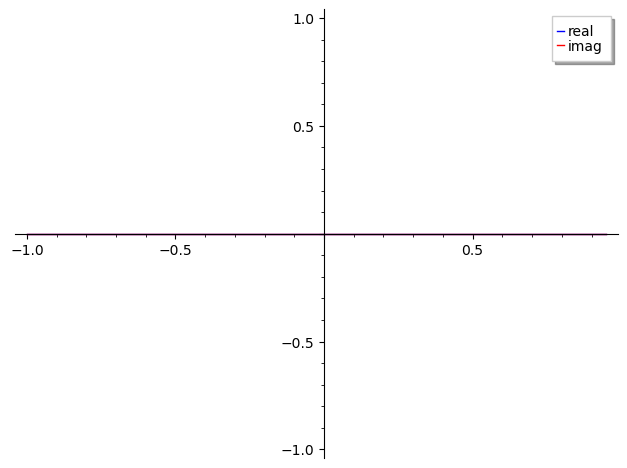

In [11]:
plot_func(fL_T, N=20, real_or_imag="both", exclude=S_half(20, -1.0, 1.0))

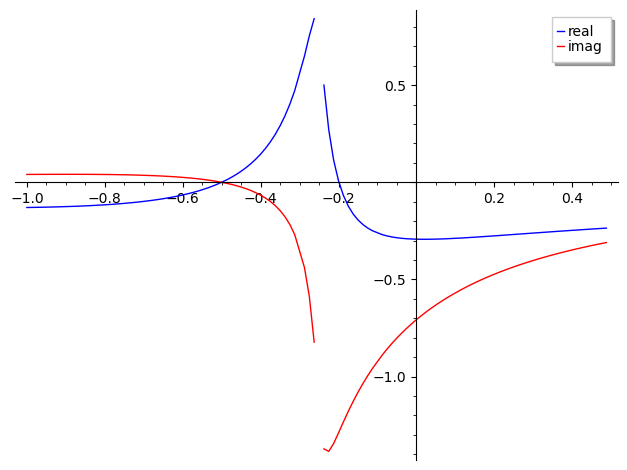

In [12]:
N = 80
low = -1.0
high = 0.5
plot_func(fL_S, N=N, low=low, high=high, real_or_imag="both", exclude=S_half(N, low, high), singular=[-1/4])

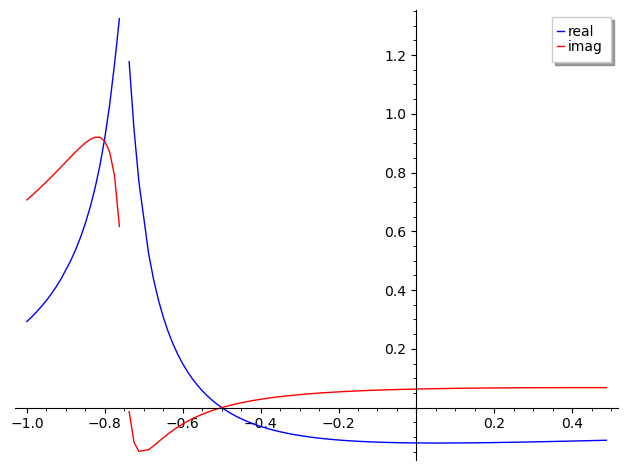

In [13]:
a, b, c, d = 3, 2, 4, 3
gamma = Gamma0(4)([a, b, c, d])
singular = [] if c == 0 else [-d/c]
exclude = S_half(N=N, low=low, high=high)
plot_func(fL_gamma(gamma), N=N, low=low, high=high, real_or_imag="both", exclude=exclude, singular=singular)